In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv("stock_prices_daily.csv")

In [6]:
dataset.head()

,Date,Ticker,Company_Name,Sector,Industry,Open,High,Low,Close,Adj_Close,Volume
0,2020-01-03 00:00:00-05:00,AAPL,Apple Inc.,Technology,Consumer Electronics,71.629153,72.455966,71.472469,71.696648,71.696648,146322800
1,2020-01-06 00:00:00-05:00,AAPL,Apple Inc.,Technology,Consumer Electronics,70.819208,72.306506,70.568510,72.267937,72.267937,118387200
2,2020-01-07 00:00:00-05:00,AAPL,Apple Inc.,Technology,Consumer Electronics,72.277571,72.533087,71.708687,71.928047,71.928047,108872000
3,2020-01-08 00:00:00-05:00,AAPL,Apple Inc.,Technology,Consumer Electronics,71.631559,73.386431,71.631559,73.085114,73.085114,132079200
4,2020-01-09 00:00:00-05:00,AAPL,Apple Inc.,Technology,Consumer Electronics,74.061360,74.830322,73.810669,74.637482,74.637482,170108400


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184138 entries, 0 to 184137
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          184138 non-null  object 
 1   Ticker        184138 non-null  object 
 2   Company_Name  184138 non-null  object 
 3   Sector        184138 non-null  object 
 4   Industry      184138 non-null  object 
 5   Open          184138 non-null  float64
 6   High          184138 non-null  float64
 7   Low           184138 non-null  float64
 8   Close         184138 non-null  float64
 9   Adj_Close     184138 non-null  float64
 10  Volume        184138 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 15.5+ MB


In [38]:
dataset.isnull().sum()
dataset.dropna(inplace=True)

In [60]:
dataset.dtypes

Date             object
Ticker           object
Company_Name     object
Sector           object
Industry         object
Open            float64
High            float64
Low             float64
Close           float64
Adj_Close       float64
Volume            int64
Next_Close      float64
dtype: object

In [39]:
dataset["Next_Close"] = dataset["Close"].shift(-1)  
# The colse of the next day will be stored in the close of today.
# [2020-01-03 00:00:00-05:00 will store close of 2020-01-06 00:00:00-05:00 that is 72.267937]

In [40]:
dataset.head(3)

,Date,Ticker,Company_Name,Sector,Industry,Open,High,Low,Close,Adj_Close,Volume,Next_Close
0,2020-01-03 00:00:00-05:00,AAPL,Apple Inc.,Technology,Consumer Electronics,71.629153,72.455966,71.472469,71.696648,71.696648,146322800,72.267937
1,2020-01-06 00:00:00-05:00,AAPL,Apple Inc.,Technology,Consumer Electronics,70.819208,72.306506,70.568510,72.267937,72.267937,118387200,71.928047
2,2020-01-07 00:00:00-05:00,AAPL,Apple Inc.,Technology,Consumer Electronics,72.277571,72.533087,71.708687,71.928047,71.928047,108872000,73.085114


In [50]:
dataset.dropna(inplace=True)

C:\Users\patel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\patel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\patel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\patel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

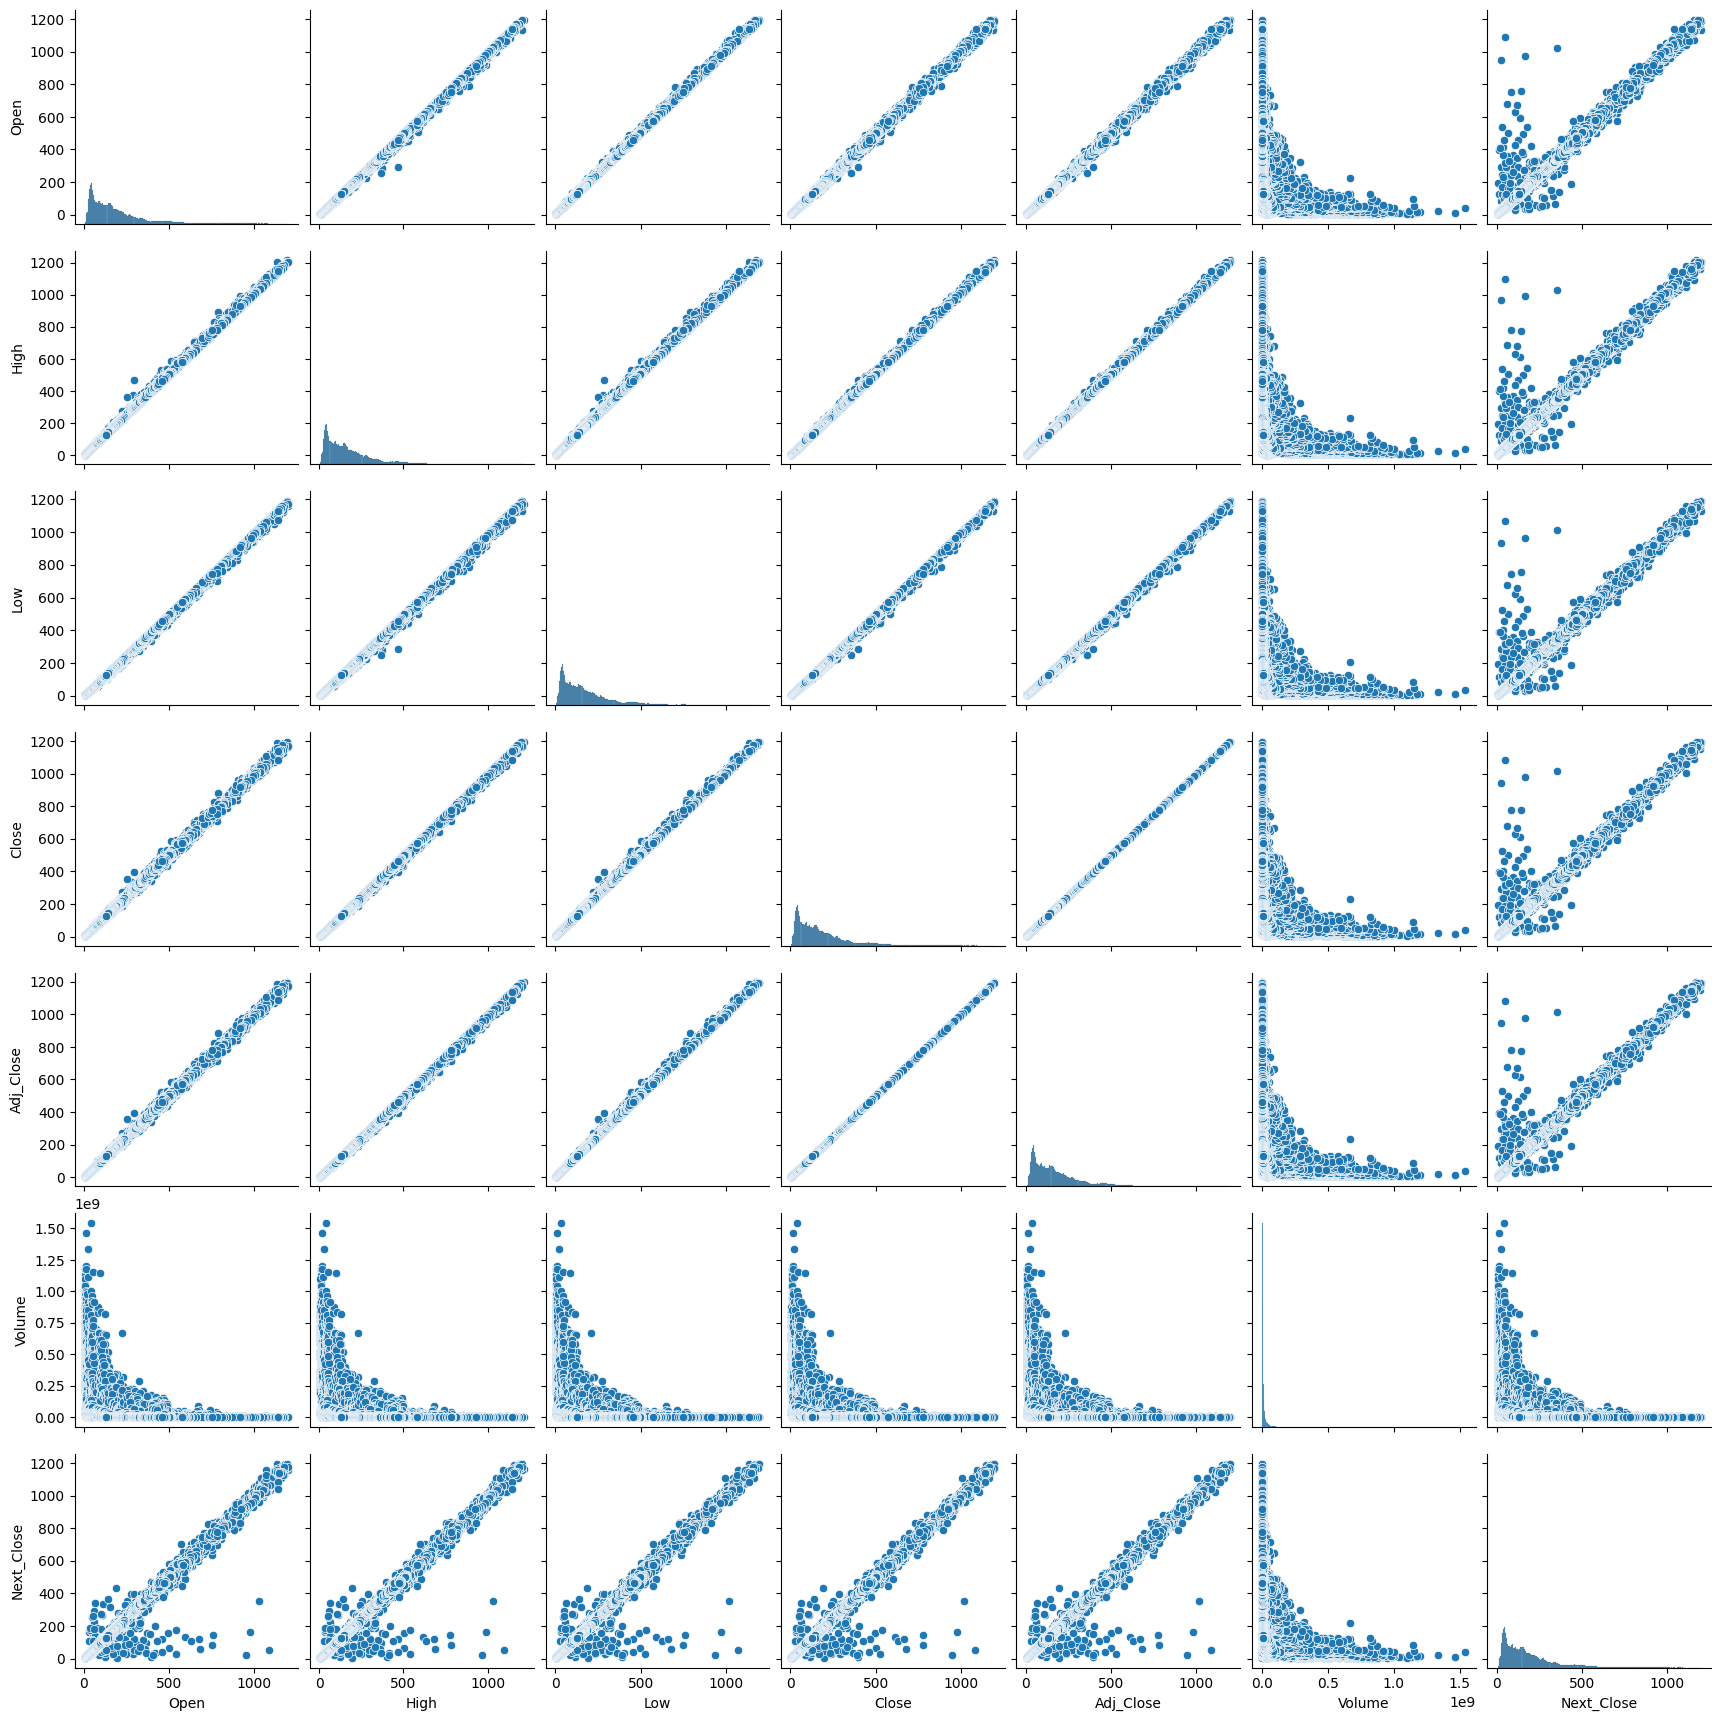

In [75]:
sns.pairplot(data=dataset)
plt.savefig("pairplot.png")
plt.show()

In [62]:
numeric_data = dataset.select_dtypes(include=['int64', 'float64'])

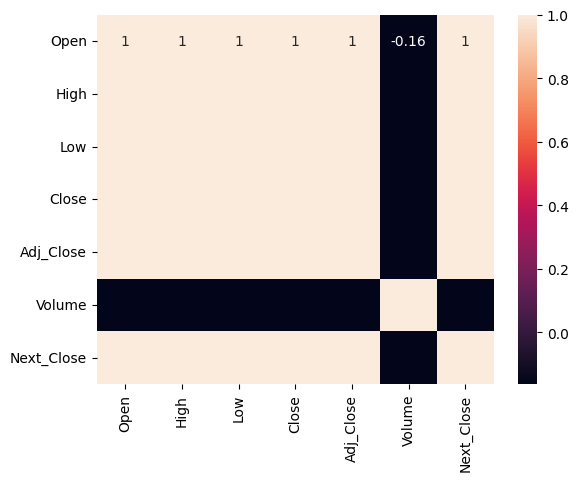

In [77]:
sns.heatmap(data=numeric_data.corr(), annot=True)
plt.show()

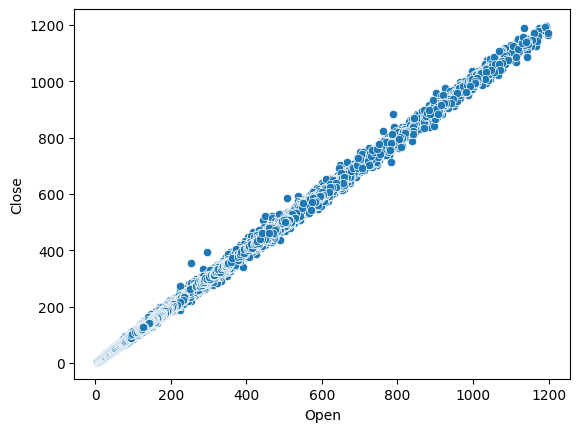

In [51]:
sns.scatterplot(x="Open", y="Close", data=dataset)
plt.show()

In [52]:
x = dataset[["Open", "High", "Low", "Volume"]]
y = dataset["Next_Close"]

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [54]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2 , random_state = 42)

In [55]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [56]:
lr.score(x_test,y_test)*100    # accuracy of model

99.69506681509418

In [67]:
lr.coef_

array([-5.55128623e-01,  7.32084745e-01,  8.22985538e-01,  2.38374209e-10])

In [68]:
lr.intercept_

np.float64(0.23628695600362448)

In [69]:
y_predict = lr.predict(x_test)

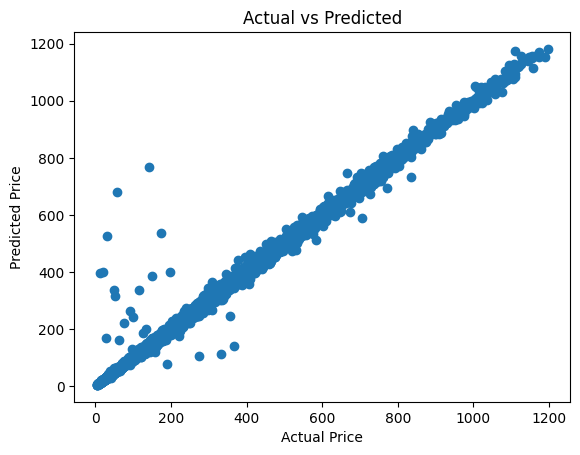

In [71]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

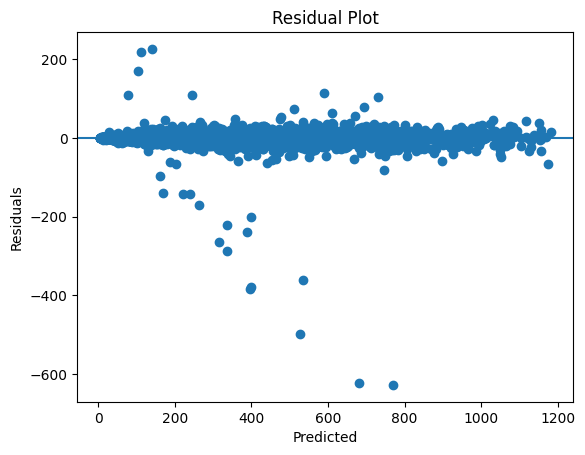

In [72]:
residuals = y_test - y_predict

plt.scatter(y_predict, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

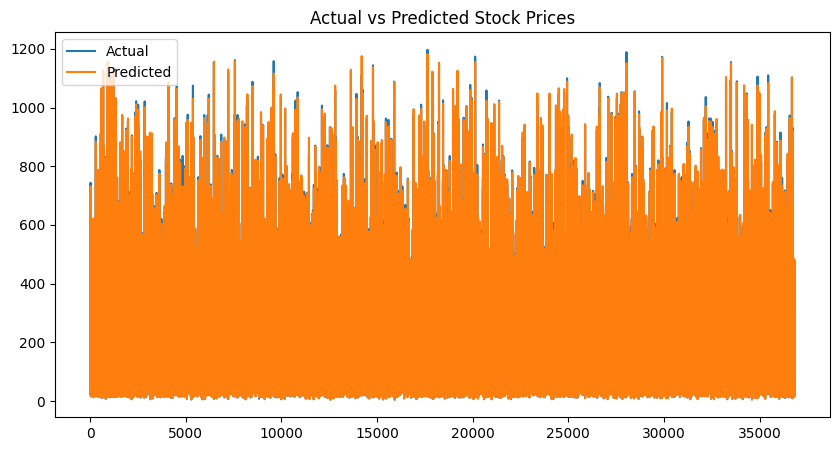

In [79]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_predict, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.savefig("actual_vs_predicted.png")
plt.show()

In [81]:
from sklearn.metrics import r2_score

print("R2 Score:", r2_score(y_test, y_predict))

R2 Score: 0.9969506681509418
